# Real-world Data Wrangling

In [1]:
#Importing important libraries

import kaggle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import ast
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
import warnings


warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

## 1. Gather data

1) Importing through an API: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

2) Manually uploading a zip file from: https://www.kaggle.com/datasets/shivamb/netflix-shows

### **1.1.** Problem Statement
In this project we will be analysing the TMDB Dataset in conjunction with the Netflix dataset to check:

**1) If there is a significant difference in the profit margins of Netflix movies where English is the primary language compared to those where English is not the primary language.**

**2) Top 10 directors based on the average vote their movies have received.**

### **1.2.** Gather at least two datasets using two different data gathering methods

#### **Dataset 1**
I selected the TMDB (The Movie Database) dataset for its comprehensive coverage of movie details, which allows for a multifaceted analysis of factors influencing a film's success. This dataset includes crucial variables such as genre, budget, revenue, and user ratings, each of which plays a significant role in understanding audience preferences and the financial success of films. By examining these variables, we can explore how accessibility and targeted demographics contribute to a movie's popularity and profitability. The data was gathered using the Kaggles API.

**Type:** CSV File

**Method:** The data was gathered using the accessing API method through Kaggle.

**Dataset variables:**

* genres
* revenue
* budget
* popularity
* language
* release date
* vote average

In [2]:
# Download dataset through Kaggle API and importing the data
kaggle.api.dataset_download_files('rounakbanik/the-movies-dataset', path='./', unzip=True)
TMDB = pd.read_csv('movies_metadata.csv')
TMDB.head(1)

Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


#### Dataset 2

I chose this dataset of Netflix movies because it provides a comprehensive overview of the content available on one of the world's leading streaming platforms. It is a great addition to our TMDB movie dataset, which lacks the director's name, cast, and a few other details. This addition allows us to analyze movie data from a few more perspectives.

**Type:** ZIP File

**Method:** The data was gathered using the "Download data manually" method from kaggle.)

**Dataset variables:**

* Director
* Cast
* Rating

In [3]:
with ZipFile('Netflix Data.zip', 'r') as z:
    with z.open('netflix_titles.csv') as file:
        NT = pd.read_csv(file)

In [4]:
NT.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


#### Dataset 3

The TMDB dataset currently does not account for inflation when displaying the budget and revenue, which limits its ability to provide a realistic representation of a movie's financial performance. This issue becomes particularly significant when aggregating data, as newer releases disproportionately influence the overall aggregates. Hence we webscrape a table containing yearly inflation rates from Investopedia.

**Type:** CSV File

**Method:** The data was gathered using "Webscraping" method from https://www.investopedia.com/inflation-rate-by-year-7253832.

**Dataset variables:**

* Year
* Inflation Rate

In [5]:
url = 'https://www.investopedia.com/inflation-rate-by-year-7253832'

# Set up Selenium WebDriver
driver = webdriver.Chrome()
driver.get(url)
driver.implicitly_wait(5)

# Finding the table
table = driver.find_element(By.XPATH, "/html/body/main/article/div[3]/div[3]/div[1]/figure/div/table")

# Get the page source after rendering
html = table.get_attribute('outerHTML')

# Use BeautifulSoup for parsing
soup = BeautifulSoup(html, 'html.parser')

# Storing our data in a list
rows = [
    [td.text.strip() for td in tr.find_all('td')] 
    for tr in soup.find_all('tr') if tr.find_all('td')
]

driver.quit()

In [6]:
# Saving the data to a dataframe and organising it
INF = pd.DataFrame(rows[1:], columns=rows[0])
INF = INF[['Year','Inflation Rate YOY, From Previous Dec.']]
INF.rename(columns={'Inflation Rate YOY, From Previous Dec.': 'Inflation Rate'}, inplace=True)
INF

,Year,Inflation Rate
0,1929,0.60%
1,1930,-6.40%
2,1931,-9.30%
3,1932,-10.30%
4,1933,0.80%
...,...,...
90,2019,2.30%
91,2020,1.40%
92,2021,7.00%
93,2022,6.50%


## 2. Assess data

### Quality Issue 1: Incorrect datatypes

In [7]:
type(TMDB['budget'][0])

str

In [8]:
type(TMDB['revenue'][0])

numpy.float64

In [9]:
type(TMDB['release_date'][0])

str

In [10]:
print(TMDB.dtypes)
print(NT.dtypes)

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating    

**Issue and justification:** Like the budget, revenue and release date, several other columns in the datasets have incorrect data types which need to be rectified. Misclassification can lead to significant data processing challenges, as operations that require numerical computation, sorting, or comparison will throw an error. To ensure accurate analysis and facilitate smoother data operations, it is essential to convert these strings to their correct integer data types before proceeding with further data handling or analysis.

### Quality Issue 2: Revenue not adjusted for inflation

In [11]:
# Inspecting the dataframe visually
TMDB[['original_title', 'release_date', 'budget', 'revenue']].head(5)

,original_title,release_date,budget,revenue
0,Toy Story,1995-10-30,30000000,373554033.0
1,Jumanji,1995-12-15,65000000,262797249.0
2,Grumpier Old Men,1995-12-22,0,0.0
3,Waiting to Exhale,1995-12-22,16000000,81452156.0
4,Father of the Bride Part II,1995-02-10,0,76578911.0


**Issue and justification:** Checking the amount spent on "Toy Story" on Google, we see that the amount was $30,000,000. Our dataset displays the same value. This means it has not been adjusted for inflation. Adjusting the data for inflation helps put films' financial success on a more even playing field, making it fairer to compare.

### Tidiness Issue 1: Violation of the Rule that 'A Single Observation Should Be Contained in One Table'

In [12]:
TMDB[TMDB['original_title'] == 'Zombieland']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
14236,False,NaN,23600000,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",http://www.zombieland.com/,19908,tt1156398,en,Zombieland,Columbus has made a habit of running from what...,11.063029,/vUzzDpVrab1BOG3ogxhRGfLN94d.jpg,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-10-07,102391382.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,This place is so dead,Zombieland,False,7.2,3655.0


In [13]:
NT[NT['title'] == 'Zombieland']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [14]:
print(TMDB.columns)
print(NT.columns)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


**Issue and justification:** The TMDB dataset contains many vital variables for our analysis. As a part of our analysis will be ranking the best directors based on the popularity of the movies. For this we will need to merge the TMDB dataset with the Netflix dataset.

### Tidiness Issue 2: Multiple values stored within a single cell

In [15]:
j = 0
for i in TMDB['genres']:
    if j > 4:
        break
    print(i)
    j += 1

[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]
[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]
[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]
[{'id': 35, 'name': 'Comedy'}]


**Issue and justification:** 
Columns like `genre`, `production_companies`, `production_countries`, and `spoken_languages` contain lists of dictionaries stored as strings. This is a data tidiness issue, as it involves multiple values within a single cell, violating the tidy data principle where each cell should contain a single value.

## 3. Clean data

In [16]:
df_TMDB = TMDB.copy()
df_NT = NT.copy()

### **Tidiness Issue 1: Merging the TMDB dataset with Netfilx Datset**

In [17]:
#Checking for the columns to merge on
print(df_TMDB.columns)
print(df_NT.columns)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [18]:
# Convert the release_date column to datetime and extracting year
df_TMDB['release_date'] = pd.to_datetime(df_TMDB['release_date'], errors='coerce')
df_TMDB['release_year'] = df_TMDB['release_date'].dt.year

In [19]:
#Merging on Movie Title and Release Year
df = pd.merge(df_TMDB, df_NT, left_on=['original_title', 'release_year'], right_on=['title', 'release_year'], how='inner')
df.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,video,vote_average,vote_count,release_year,show_id,type,title_y,director,cast,country,date_added,rating,duration,listed_in,description
0,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,1995.0,s6867,Movie,GoldenEye,Martin Campbell,"Pierce Brosnan, Sean Bean, Izabella Scorupco, ...","United Kingdom, United States","December 31, 2019",PG-13,130 min,Action & Adventure,Pierce Brosnan takes his first turn as debonai...
1,False,NaN,62000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,9087,tt0112346,en,The American President,"Widowed U.S. president Andrew Shepherd, one of...",6.318445,/lymPNGLZgPHuqM29rKMGV46ANij.jpg,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-11-17,107879496.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Why can't the most powerful man in the world h...,The American President,False,6.5,199.0,1995.0,s8188,Movie,The American President,Rob Reiner,"Michael Douglas, Annette Bening, Martin Sheen,...",United States,"January 1, 2021",PG-13,113 min,"Comedies, Dramas, Romantic Movies",The widowed president strikes up a romance wit...
2,False,"{'id': 117693, 'name': 'Balto Collection', 'po...",0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",NaN,21032,tt0112453,en,Balto,An outcast half-wolf risks his life to prevent...,12.140733,/gV5PCAVCPNxlOLFM1bKk50EqLXO.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,11348324.0,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Part Dog. Part Wolf. All Hero.,Balto,False,7.1,423.0,1995.0,s6221,Movie,Balto,Simon Wells,"Kevin Bacon, Bob Hoskins, Bridget Fonda, Jim C...",United States,"April 1, 2018",G,78 min,"Children & Family Movies, Dramas","Balto, who is half wolf and half dog, endures ..."


**Justification:** We merged the dataset into 1 using the common column of Titles and Release Year. Release Year was used as multiple entries have common title name which can cause mismatch in the merger.

### **Tidiness Issue 2: Unpacking and Splitting Nested List Data into Separate Columns**

In [20]:
# Columns that need to be split
split_cols = ['production_companies','production_countries', 'genres', 'spoken_languages', 'belongs_to_collection']

In [21]:
#Creating a function to split the columns
def process_columns(df, split_cols):
    for col in split_cols:
        df[col] = df[col].apply(lambda x: ast.literal_eval(x) if not pd.isna(x) and x != 'nan' else np.nan)
        df[col] = df[col].apply(lambda x: [d['name'] for d in x] if isinstance(x, list) else [])
        df[col] = df[col].apply(lambda x: '|'.join(x))
        temp_df = df[col].str.split('|', expand=True)
        temp_df.columns = [f"{col}_{i}" for i in range(temp_df.shape[1])]
        df = pd.concat([df, temp_df], axis=1)
        df.drop([col], inplace=True, axis=1)
    
    return df

df = process_columns(df, split_cols)

In [22]:
df.iloc[0:3,31:]

,production_companies_0,production_companies_1,production_companies_2,production_companies_3,production_companies_4,production_companies_5,production_companies_6,production_companies_7,production_companies_8,production_companies_9,production_companies_10,production_companies_11,production_companies_12,production_companies_13,production_companies_14,production_companies_15,production_companies_16,production_countries_0,production_countries_1,production_countries_2,production_countries_3,production_countries_4,production_countries_5,production_countries_6,production_countries_7,production_countries_8,production_countries_9,genres_0,genres_1,genres_2,genres_3,genres_4,genres_5,genres_6,spoken_languages_0,spoken_languages_1,spoken_languages_2,spoken_languages_3,spoken_languages_4,spoken_languages_5,spoken_languages_6,spoken_languages_7,spoken_languages_8,belongs_to_collection_0
0,United Artists,Eon Productions,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,United Kingdom,United States of America,None,None,None,None,None,None,None,None,Adventure,Action,Thriller,None,None,None,None,English,Pусский,Español,None,None,None,None,None,None,
1,Columbia Pictures,Castle Rock Entertainment,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,United States of America,None,None,None,None,None,None,None,None,None,Comedy,Drama,Romance,None,None,None,None,English,None,None,None,None,None,None,None,None,
2,Universal Pictures,Amblin Entertainment,Amblimation,None,None,None,None,None,None,None,None,None,None,None,None,None,None,United States of America,None,None,None,None,None,None,None,None,None,Family,Animation,Adventure,None,None,None,None,English,None,None,None,None,None,None,None,None,


**Justification:** We used the .literal_eval to evaluate the string in the columns and then extract the intended values from the dictionary. We then concatinate all values extracted with a '|' in between each value and then split the string on '|' into different columns.

### **Quality Issue 1: Standardizing Data Types for Consistency**

In [23]:
# Creating lists of column headers that need datatype correction

to_bool = ['adult', 'video']
to_int = ['id', 'budget', 'release_year', 'revenue']
to_float = ['popularity']
to_date = ['date_added']

# Creating functions to correct datatypes

def ToBool(df,cols):
    for i in cols:
        df[i] = df[i].astype(bool)

def ToInt(df,cols):
    for i in cols:
        df[i] = df[i].astype(np.int64)
        
def ToFloat(df,cols):
    for i in cols:
        df[i] = df[i].astype(np.float64)

def ToDate(df,cols):
    for i in cols:
        df[i] = pd.to_datetime(df[i])

ToBool(df,to_bool)
ToInt(df,to_int)
ToFloat(df,to_float)
ToDate(df,to_date)

In [24]:
df.dtypes

adult                        bool
budget                      int64
homepage                   object
id                          int64
imdb_id                    object
                            ...  
spoken_languages_5         object
spoken_languages_6         object
spoken_languages_7         object
spoken_languages_8         object
belongs_to_collection_0    object
Length: 75, dtype: object

**Justification:** This fix ensures that each column in the dataset is converted to its appropriate data type, improving data consistency and enabling us to work with the data in the appropriate manner.

### Quality Issue 2: Adjusting for Inflation

In [25]:
# Convering and organising the data
INF = pd.DataFrame(rows[1:], columns=rows[0])
INF = INF[['Year','Inflation Rate YOY, From Previous Dec.']]
INF.rename(columns={'Inflation Rate YOY, From Previous Dec.': 'inflation_rate'}, inplace=True)
INF['Year'] = INF['Year'].astype(int)

# Filtering for necessary years
INF = INF[INF['Year'].isin(list(range(df['release_year'].min(), df['release_year'].max() + 1)))]

# Convert the inflation_rate to a multiplier (1 + inflation_rate / 100)
INF['inflation_rate'] = INF['inflation_rate'].str.replace('%', '').astype(float)

In [26]:
# Initialize the adjustment factor for 2018
INF['adjustment_factor'] = 1.000000

# Loop through the DataFrame in reverse order (starting from 2017 to 1942)
for i in range(len(INF) - 2, -1, -1):
    INF.iloc[i, INF.columns.get_loc('adjustment_factor')] = (1 + INF.iloc[i, INF.columns.get_loc('inflation_rate')] / 100) * INF.iloc[i + 1, INF.columns.get_loc('adjustment_factor')]
INF.head(3)

,Year,inflation_rate,adjustment_factor
13,1942,9.0,15.874485
14,1943,3.0,14.563748
15,1944,2.3,14.139561


In [27]:
# Mapping the adjustment factor to the respective movies by using the common columns of release year
df = pd.merge(df, INF, left_on='release_year', right_on='Year', how='left')

In [28]:
# Calculating the adjusted budget and adjusted revenue
df['adj_budget'] = df['budget'] * df['adjustment_factor']
df['adj_revenue'] = df['revenue'] * df['adjustment_factor']

**Justification:** The budget and revenue mentioned in the TMDB dataset has not been adjusted for inflation. To even the playing field and make for better analysis, we webscraped a table with inflation rates for individual years and used it to calculate inflation adjusted values for the budget and revenue.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [29]:
# Calculating profit and profit percentage
df['profit'] = df['adj_revenue']-df['adj_budget']
df['profit_pcnt'] = df['profit']/df['adj_budget']

In [30]:
# Filtering to only keep necessary columns
df1 = df[['release_year', 'Year', 'original_title', 'adj_budget', 'adj_revenue', 'profit', 'profit_pcnt', 'popularity', 
    'genres_0', 'genres_1', 'genres_2', 'genres_3', 'genres_4', 'genres_5', 'genres_6',
    'spoken_languages_0', 'original_language', 'vote_count','vote_average','adult','belongs_to_collection_0', 'director']]

## 4. Update your data store

In [31]:
# Saving it in CSV format to cleaned_movie_data.csv
df1.to_csv('cleaned_movie_data.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 

1) Is there a significant difference in the median profits of Netflix movies where English is the primary language compared to those where English is not the primary language?

2) Which directors have the highest average vote for their movies on Netflix?

In [32]:
# Creating separate dataframes for english and non-english movies
df1['eng/non'] = df1['spoken_languages_0'].apply(lambda x: "English" if 'English' in x else "Non-English")
df1 = df1[(df1['adj_budget']>100)&(df1['adj_revenue']>100)]

In [33]:
# Grouping the dataset by the english/non-english column and calculating mean profit percentage of both
df_eng_non = df1.groupby('eng/non').agg({'adj_budget':'mean', 'adj_revenue':'mean'})
df_eng_non['profit'] = df_eng_non['adj_revenue'] - df_eng_non['adj_budget']
df_eng_non['profit_pcnt'] = df_eng_non['profit']/df_eng_non['adj_budget']
print(df_eng_non)

               adj_budget   adj_revenue        profit  profit_pcnt
eng/non                                                           
English      5.607000e+07  1.757299e+08  1.196599e+08     2.134117
Non-English  3.569672e+07  1.207945e+08  8.509783e+07     2.383912


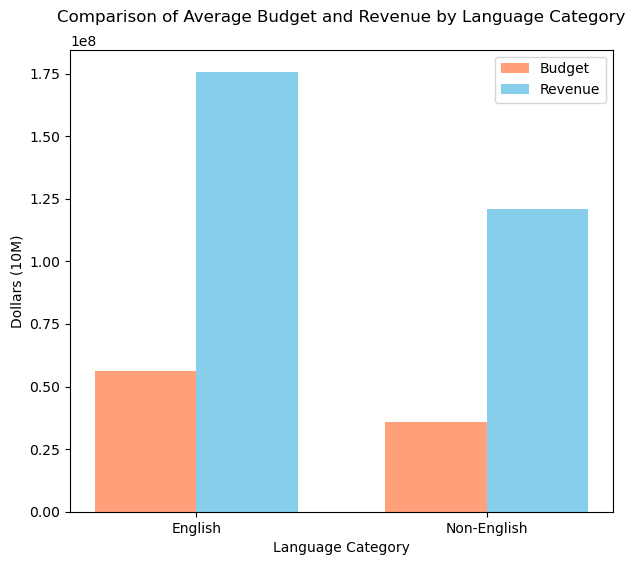

In [34]:
# Plotting the figure
fig, ax = plt.subplots(figsize=(7, 6))
width = 0.35
x = np.arange(len(df_eng_non))

# Plotting the bars for 'budget' and 'revenue'
ax.bar(x - width/2, df_eng_non['adj_budget'], width, label='Budget', color='#FFA07A')
ax.bar(x + width/2, df_eng_non['adj_revenue'], width, label='Revenue', color='skyblue')

# Adding labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Language Category')
ax.set_ylabel('Dollars (10M)')
ax.set_title('Comparison of Average Budget and Revenue by Language Category', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(df_eng_non.index)
ax.legend()
plt.show()

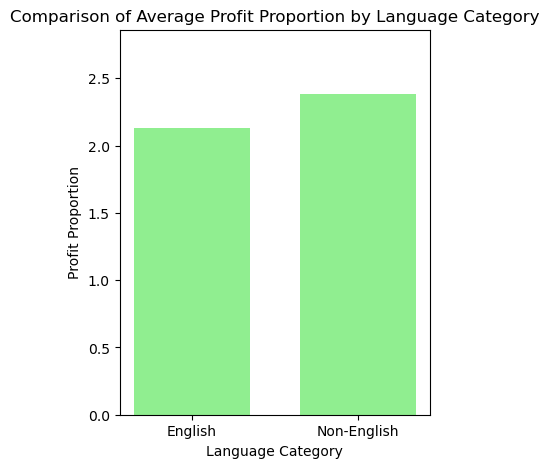

In [35]:
# Setting up the plot
fig, ax = plt.subplots(figsize=(4, 5))
width = 0.7
x = np.arange(len(df_eng_non))

# Plotting the bars for 'profit_pcnt'
ax.bar(x, df_eng_non['profit_pcnt'], width, color='lightgreen')

# Adding labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Language Category')
ax.set_ylabel('Profit Proportion')
ax.set_title('Comparison of Average Profit Proportion by Language Category')
ax.set_xticks(x)
ax.set_xticklabels(df_eng_non.index)
ax.set_ylim(0, df_eng_non['profit_pcnt'].max() * 1.2)
plt.show()

**Answer to research question:** 

We see that non-English movies have a much smaller budget compared to English movies. However, despite these smaller budgets, the profit percentages are relatively close to each other. With English movies having an average profit of 216% and non-English movies having an average profit of 245%, non-English movies earn approximately 13% more profit than English movies on average. This suggests that, relative to their budget, non-English movies are yielding slightly higher returns, even though they start with a smaller financial investment.

In [36]:
# We want to exclude movies which have multiple directors
df1 = df1[~df1['director'].str.contains(',', na=False)]

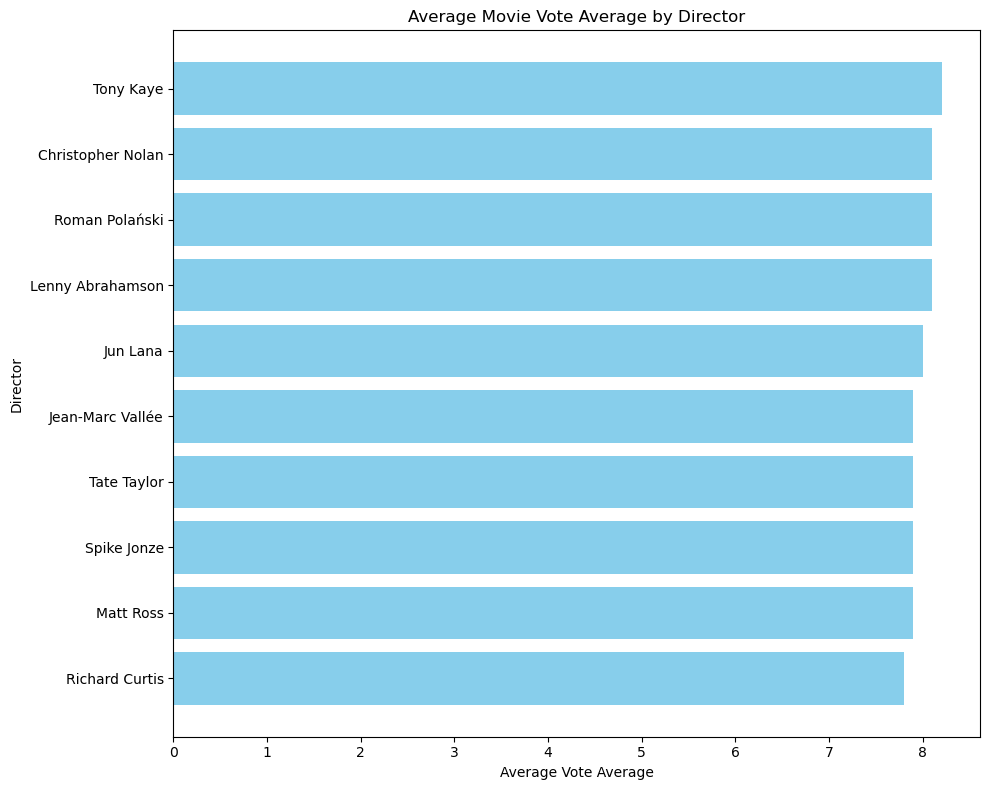

In [37]:
director_pop = df1.groupby('director').agg({'vote_average': 'mean'}).sort_values(by='vote_average', ascending=True)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot a horizontal bar chart
ax.barh(director_pop.index[-10:], director_pop['vote_average'][-10:], color='skyblue')

# Adding labels and title
ax.set_xlabel('Average Vote Average')
ax.set_ylabel('Director')
ax.set_title('Average Movie Vote Average by Director')

# Adjusting layout for better visualization
plt.tight_layout()
plt.show()

In [38]:
print(director_pop[:-11:-1])

                   vote_average
director                       
Tony Kaye                   8.2
Christopher Nolan           8.1
Roman Polański              8.1
Lenny Abrahamson            8.1
Jun Lana                    8.0
Jean-Marc Vallée            7.9
Tate Taylor                 7.9
Spike Jonze                 7.9
Matt Ross                   7.9
Richard Curtis              7.8


In [39]:
# Filter only the directors in the top 11 (based on vote_average)
top_directors = director_pop.index[-10:]

# Loop through only the top 11 directors
for i in top_directors[::-1]:
    ref = df1['director'] == i
    movie_titles = df1['original_title'][ref].values
    movie_vote_averages = df1['vote_average'][ref].values

    # Print each movie's title and vote_average for the director
    for title, vote_average in zip(movie_titles, movie_vote_averages):
        print(f"Director: {i} | Movie: '{title}' | Vote Average: {vote_average}")

Director: Tony Kaye | Movie: 'American History X' | Vote Average: 8.2
Director: Christopher Nolan | Movie: 'Inception' | Vote Average: 8.1
Director: Roman Polański | Movie: 'The Pianist' | Vote Average: 8.1
Director: Lenny Abrahamson | Movie: 'Room' | Vote Average: 8.1
Director: Jun Lana | Movie: 'Bwakaw' | Vote Average: 8.0
Director: Jean-Marc Vallée | Movie: 'Dallas Buyers Club' | Vote Average: 7.9
Director: Tate Taylor | Movie: 'The Help' | Vote Average: 7.9
Director: Spike Jonze | Movie: 'Her' | Vote Average: 7.9
Director: Matt Ross | Movie: 'Captain Fantastic' | Vote Average: 7.9
Director: Richard Curtis | Movie: 'About Time' | Vote Average: 7.8


**Answer to research question:** 

Here are the **top 10 directors** along with the movies they directed and their vote averages:

**Tony Kaye** | American History X | 8.2  
**Christopher Nolan** | Inception | 8.1  
**Roman Polański** | The Pianist | 8.1  
**Lenny Abrahamson** | Room | 8.1  
**Jun Lana** | Bwakaw | 8.0  
**Jean-Marc Vallée** | Dallas Buyers Club | 7.9  
**Tate Taylor** | The Help | 7.9  
**Spike Jonze** | Her | 7.9  
**Matt Ross** | Captain Fantastic | 7.9  
**Richard Curtis** | About Time | 7.8  

### **5.2:** Reflection

If I had more time to work on this project i would tackle the problem of having multiple genre columns. As the dataset is right now, we see the same genre occouring in different columns for different entries. This could be fixed by using one hot encoding.

I would also focus on collecting more recent datasets and including data from movies on other OTT platforms. This would provide a more holistic view of the film industry, as relying on data from individual OTT services can introduce biases toward certain genres or audiences, potentially misrepresenting the industry as a whole.

Additionally, I would perform a time series analysis to examine monthly and yearly trends. The inflation dataset included columns highlighting major economic events over the years, which I could analyze to understand their impacts on consumer behavior and how they influenced the industry.

I would also explore identifying the most influential actors and trends in genres. For example, determining which genres typically require higher budgets or examining the popularity of genres across various years. Technology undoubtedly plays a significant role in shaping the types of movies that can be produced during a particular era, and analyzing this aspect could yield valuable insights.